<a href="https://colab.research.google.com/github/VietPham1005/Machine-Learning/blob/main/Classification_with_Decision_Tree_IRIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#IMPORT THƯ VIỆN

In [1]:
#import thư viện
import numpy as np, pandas as pd
import matplotlib.pyplot as plt #Thư viện cho vẽ hình
plt.rcParams.update({'figure.figsize':(7,3), 'figure.dpi':120}) #Cài đặt kích thước cho toàn bộ các hình trong file notebook này giống nhau

#LOAD DATASET TRỰC TIẾP TỪ THƯ VIỆN SKLEARN

In [2]:
#Dataset sử dụng trực tiếp trên thư viện sklearn
# Đặc điểm của loài hoa iris này mọi người có thể xem hình ảnh tại đây: https://www.analyticsvidhya.com/blog/2022/06/iris-flowers-classification-using-machine-learning/
from sklearn.datasets import load_iris
iris = load_iris() #Dữ liệu về đặc điểm của hoa Iris
dir(iris)#Ta dùng lệnh này để lấy tên các cột trong data set

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

#ĐƯA DATA VÀO DATAFRAME

In [3]:
#Đưa dữ liệu và các tên cột tương ứng vào 1 data frame để dễ hình dung
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


#THÊM CỘT TARGET (3 LOẠI HOA) VÀO DF

In [4]:
df['target'] = iris.target #Bảng dữ liệu trên còn thiếu cột target (cột này gồm 3 loại -- Iris Setosa -- Iris Versicolour -- Iris Virginica)
df.sample(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
65,6.7,3.1,4.4,1.4,1
49,5.0,3.3,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
97,6.2,2.9,4.3,1.3,1
116,6.5,3.0,5.5,1.8,2


#CHUẨN BỊ TẬP TRAIN VÀ TEST

In [5]:
#Chuẩn bị data đã xong ta phân chia các tập train và test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop(['target'],axis='columns'),iris.target,test_size=0.9) #dùng drop để xóa bỏ cột data "target" ra khỏi tập X, vì "target" chính là y

#GỌI MÔ HÌNH DECISIONTREE CLASSIFIER

In [6]:
from sklearn import tree #Gọi mô hình và training đơn giản như các thuật toán đã học ở bài trước
model_tree = tree.DecisionTreeClassifier()
model_tree.fit(X_train, y_train) #Training mô hình

DecisionTreeClassifier()

#ĐÁNH GIÁ ĐỘ DỰ ĐOÁN CỦA MÔ HÌNH - VẼ CONFUSION MATRIX

In [7]:
#Đánh giá độ chính xác của mô hình
y_pred=model_tree.predict(X_test)

In [8]:
y_pred

array([0, 2, 1, 2, 1, 0, 2, 2, 1, 2, 0, 2, 0, 1, 0, 1, 1, 1, 1, 0, 1, 2,
       0, 1, 1, 2, 0, 1, 1, 1, 0, 0, 1, 2, 0, 1, 0, 2, 1, 0, 1, 1, 1, 1,
       2, 1, 0, 1, 2, 1, 0, 1, 0, 1, 2, 2, 2, 1, 2, 2, 2, 1, 1, 2, 0, 1,
       1, 2, 0, 2, 1, 2, 1, 2, 2, 0, 0, 1, 0, 1, 2, 0, 2, 1, 1, 1, 2, 0,
       2, 1, 1, 1, 0, 1, 0, 2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 0, 2, 0, 2, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 2, 1, 2, 1, 2, 0, 0, 1, 1,
       2, 1, 0])

In [9]:
y_test

array([0, 2, 1, 1, 1, 0, 2, 2, 0, 2, 0, 2, 0, 1, 0, 1, 1, 1, 1, 0, 1, 2,
       0, 1, 1, 2, 0, 1, 1, 1, 0, 1, 1, 2, 0, 1, 0, 2, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 2, 1, 0, 0, 0, 1, 2, 2, 2, 1, 2, 2, 2, 1, 1, 2, 0, 0,
       1, 2, 0, 2, 1, 2, 1, 2, 2, 1, 0, 1, 0, 1, 2, 0, 2, 1, 0, 1, 2, 0,
       2, 1, 0, 0, 0, 1, 0, 2, 2, 0, 2, 2, 2, 2, 2, 0, 1, 0, 2, 0, 2, 0,
       1, 0, 2, 0, 0, 0, 0, 1, 0, 0, 1, 0, 2, 2, 0, 2, 1, 2, 0, 0, 2, 1,
       2, 1, 0])

##CONFUSION MATRIX

In [10]:
import seaborn as sns
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[31, 17,  0],
       [ 2, 41,  2],
       [ 0,  2, 40]])

Text(0.5, 3.266666666666663, 'Dự báo')

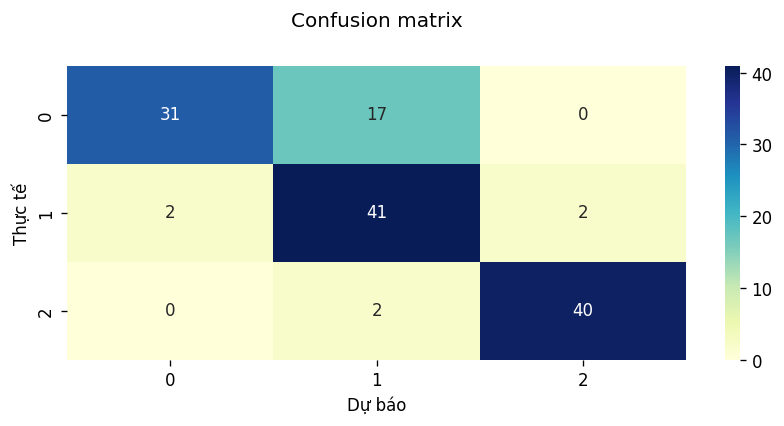

In [11]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix
class_names=['Setosa','Versicolor','Verginica'] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Thực tế')
plt.xlabel('Dự báo')

##ACCURACY SCORE

In [15]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred) #Độ chính xác của DT

0.8296296296296296

#VẼ CÂY QUYẾT ĐỊNH

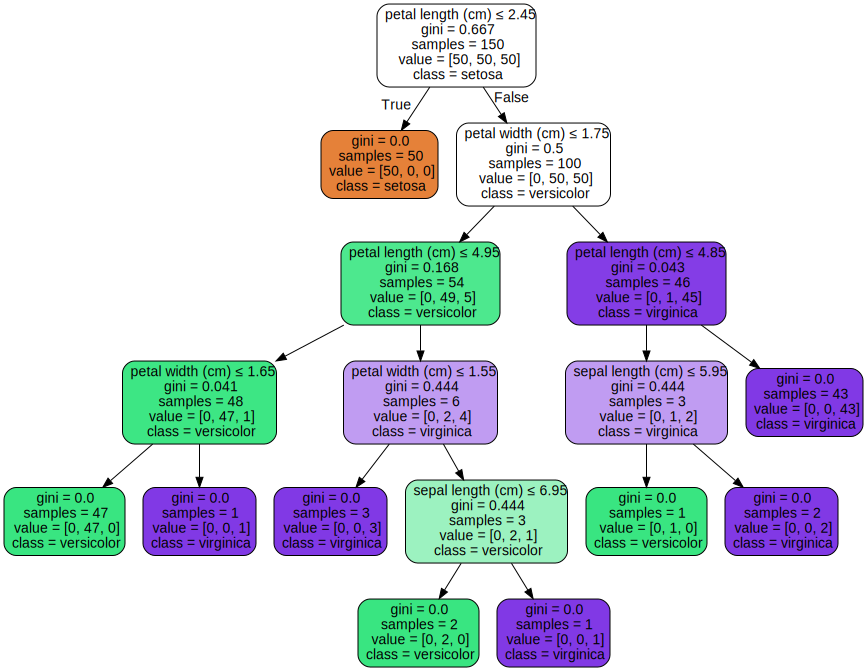

In [16]:
from sklearn import tree
X, y = iris.data, iris.target
model = tree.DecisionTreeClassifier(max_depth=5)
model = model.fit(X, y)#Tính toán/fit model
import graphviz #Thư viện để hiển thị
dot_data = tree.export_graphviz(model, out_file=None,feature_names=iris.feature_names,class_names=iris.target_names,filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph